<a href="https://colab.research.google.com/github/z-arabi/SRU-deeplearning-workshop/blob/master/12_Lr_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/z-arabi/SRU-deeplearning-workshop
%cd SRU-deeplearning-workshop

Cloning into 'SRU-deeplearning-workshop'...
remote: Enumerating objects: 269, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 269 (delta 25), reused 11 (delta 7), pack-reused 213
Receiving objects: 100% (269/269), 33.22 MiB | 9.78 MiB/s, done.
Resolving deltas: 100% (124/124), done.
/content/SRU-deeplearning-workshop


In [ ]:
from classFiles.learningratefinder import LearningRateFinder

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
import os
import datetime

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

In [ ]:
MIN_LR = 1e-5

In [ ]:
model = create_model()
opt = tf.keras.optimizers.SGD(lr=MIN_LR, momentum=0.9)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/2
1875/1875 [==============================] - 13s 6ms/step - loss: 2.3743 - accuracy: 0.0970
Epoch 2/2
1875/1875 [==============================] - 12s 6ms/step - loss: 1.5580 - accuracy: 0.5643


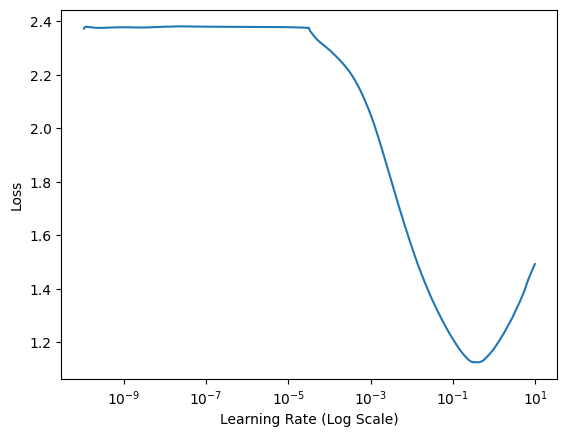

In [ ]:
# initialize the learning rate finder and then train with learning
# rates ranging from 1e-10 to 1e+1
lrf = LearningRateFinder(model)
lrf.find((x_train, y_train),1e-10, 1e+1)
# plot the loss for the various learning rates and save the
# resulting plot to disk
lrf.plot_loss()


### based on:
https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/